# Hausaufgabe 3 &ndash; Normal Edition
## "Malen nach Zahlen"
<!-- Lizensiert unter (CC BY 4.0), Gert Herold -->

Um das Strömungsfeld um einen kreisförmigen Zylinder mit einem Durchmesser von 7,5 mm besser zu verstehen, wurden [CFD-Simulationen](https://de.wikipedia.org/wiki/Numerische_Str%C3%B6mungsmechanik) durchgeführt. 
Die Berechnungen wurden auf einem unregelmäßigen 2D-Gitter durchgeführt, das den Zylinder durchschneidet, so dass er darin als Kreis erscheint. 
Die Ergebnisse für einen diskreten Zeitpunkt wurden als [CSV-Datei](https://de.wikipedia.org/wiki/CSV_(Dateiformat)) exportiert.

**Die gesamte Programmierung für diese Aufgabe kann ohne if-Anweisungen oder Schleifen durchgeführt werden! Es ist okay, wenn Sie diese zunächst für eine erste Lösung benötigen, aber versuchen Sie, eine Variante zu finden, die diese Strukturen nicht benötigt und stattdessen die Funktionalitäten von Numpy nutzt.**

### 1) Gitterparameter

**1.1) Laden Sie die Daten aus der Datei `U_xyplane.csv` und entpacken Sie den Inhalt der Spalten in neue Variablen (1D-Arrays) u, v, w, x, y, z. Für wie viele Punkte liegen Daten vor?**

_Hinweise: Die Zeilen eines Arrays `A` mit 2 Zeilen lassen sich z.B. so "entpacken": `a,b = A`. Alle Werte sind in SI-Einheiten gegeben (m und m/s). Geschwindigkeitskomponenten werden in der Datei mit "U" bezeichnet, Koordinaten mit "Points"._

In [29]:
import matplotlib.colors
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

In [30]:
import pandas as pd
import matplotlib.patches as patch

In [31]:
# Hier eigenen Code schreiben ...
"""
Strömungsfeld
kreisförmiger zylinder 
Durchmesser = 7,5 mm
CFD-Simulationen    -   Berechnung auf einem unregelmäßigen 2D-Gitter - schneidet Zylinder durch --> Es erscheint ein Kreis drin
Ergebnisse zu DISKRETEM ZEITPUNK -> CSV
Man kann alles ohne if und schleifen machen -> Numpy Funktionen nutzen
"""

df = pd.read_csv("U_xyplane.csv")
# df

# Mit Numpy:
df_1 = np.loadtxt('U_xyplane.csv', delimiter=',', skiprows=1, )
print(f"Pandas DataFrame: {df.shape}")
print(f"Numpy DataFrame/Matrix: {df_1.shape}")

# jetzt mit Variablen:
u, v, w, x, y, z = np.loadtxt('U_xyplane.csv', delimiter=',', skiprows=1, unpack=True)
u.shape


Pandas DataFrame: (35267, 6)
Numpy DataFrame/Matrix: (35267, 6)


(35267,)

In [32]:
print(u.shape, v.shape, w.shape, x.shape, y.shape, z.shape)
# print(x[:10])
print(f"Es gibt insgesamt {u.shape[0]} rows und 6 columns")

(35267,) (35267,) (35267,) (35267,) (35267,) (35267,)
Es gibt insgesamt 35267 rows und 6 columns


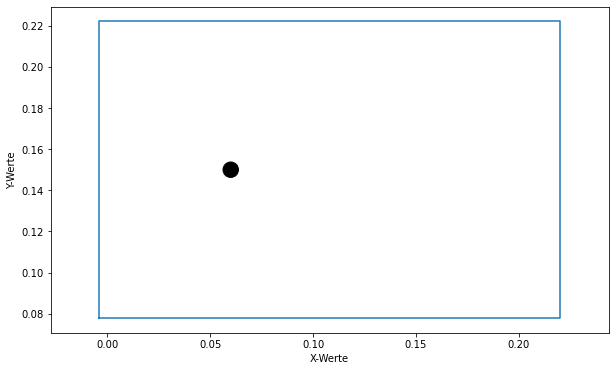

In [33]:
"""
minimalen und maximalen Werte von x,y
Rechteck zeichnen, dass die Betrachtete Fläche abdeckt 
Kreis zeichnen mit (x,y) = (0.06 m, 0.15 m) Durchmesser 7.5 mm

Funktion, Übergabe x,y Ausdehnung
plot Rechteckumrandung
Kreis in eine bestehende Abbildung einzufügen ist möglich: 
 
plt.gca().add_patch(Circle((x_center, y_center), radius, color='k'))
"""


def rechteck(xmin, xmax, ymin, ymax):
    # Hier eigenen Code schreiben ...
    arr_x = np.array([xmin, xmax, xmax, xmin, xmin])
    arr_y = np.array([ymin, ymin, ymax, ymax, ymin])
    plt.plot(arr_x, arr_y)

def rechteck_array(xmin, xmax, ymin, ymax):
    arr_x = np.array([xmin, xmax, xmax, xmin, xmin])
    arr_y = np.array([ymin, ymin, ymax, ymax, ymin])
    return arr_x, arr_y


plt.figure(1, (10, 6))
# Rechteck plotten ...
rechteck(x.min(), x.max(), y.min(), y.max())
# Kreis plotten ...

kreis_radius = 0.0075 / 2  #Durchmesser durch 2
kreis_xy = (0.06, 0.15)
plt.gca().add_patch(patch.Circle(kreis_xy, radius=kreis_radius, color='k'))

# Achsenbbeschriftungen hinzufügen ...
plt.xlabel("X-Werte")
plt.ylabel("Y-Werte")

plt.axis('equal')
plt.show()

Vor der Auswertung der eigentlichen Daten soll zunächst die Gitterstruktur genauer untersucht werden.

**1.3) Visualisieren Sie das Gitter.**

  * Zeichnen Sie alle Gitterpunkte in einem 20x13-Zoll-Plot unter Verwendung von `'.'`-Markern (kleine Punkte) mit einer Größe von 0.5.
  * Bestimmen Sie den Teilbereich des Gitters, der nur Punkte mit $5.9\,$cm $< x < 6.1\,$cm and $y > 15\,$cm enthält. 
  * Wie viele Punkte liegen in diesem Bereich?
  * Zeichnen Sie die entsprechenden Gitterpunkte mit einer anderen Farbe in die ursprüngliche Abbildung ein.

_Hinweis: Um mehrere boolesche Ausdrücke in Arrays zu kombinieren, können die [bitweisen Operatoren](https://wiki.python.org/moin/BitwiseOperators) `&` (und) sowie `|` (oder) verwendet werden._

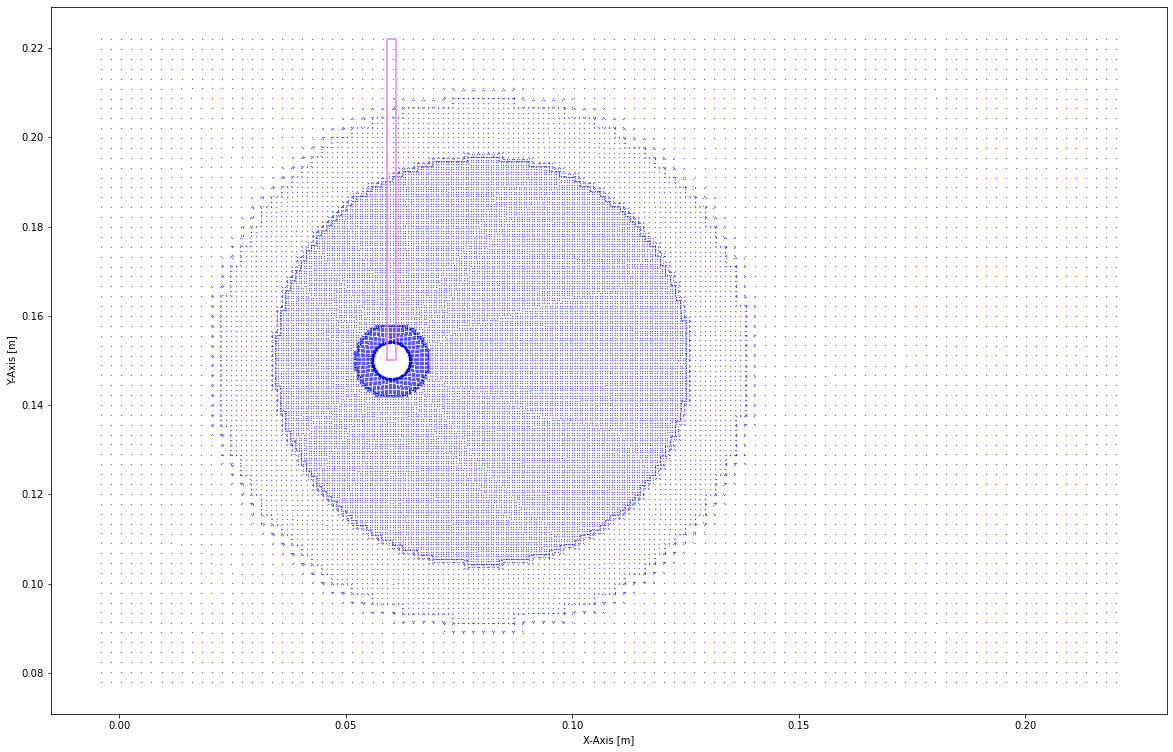

In [34]:
# Hier eigenen Code schreiben ...
# Gitterpunkte ineinem 20x13 Plot unter Verwendung von '.'-Markern (kleine Punkte) mit einer Größe von 0.5
plt.figure(figsize=(20, 13))
# plt.grid(linestyle='dotted', linewidth=0.5, color='r')
plt.plot(x, y, color='blue', linestyle='None',
         linewidth=0.5, marker='.', markersize=0.5)
area_x, area_y = rechteck_array(0.059, 0.061, 0.15, y.max())
plt.plot(area_x, area_y, linestyle='-', linewidth=1.5, color='violet')

plt.xlabel("X-Axis [m]")
plt.ylabel("Y-Axis [m]")

plt.show()
# xy_trans
# values

In [35]:
x_low = 0.059
x_high = 0.061
y_low = 0.15

xy_tmp = np.array([x.copy(),y.copy()])
print(xy_tmp.shape)

xy_trans = xy_tmp.T

# Version mit for Schleife
# ll = [[],[]]
# for xx, yy in zip(xy_tmp[0], xy_tmp[1]):
#     if x_low < xx < x_high:
#         if yy > y_low:
#             ll[0].append(xx)
#             ll[1].append(yy)
# values = np.array(ll )


# Version mit Numpy
# print(np.where(np.logical_and(np.logical_and(x > x_low, x < x_high), y > y_low) ))
values = xy_tmp[:, np.where(np.logical_and(np.logical_and(x > x_low, x < x_high), y > y_low) )]
values = values[:,0,:]

# values_complex = np.array([complex(i,j) for i,j in zip(ll[0], ll[1])])

print(values.shape)
values

(2, 35267)
(2, 516)


array([[0.0606399, 0.0603477, 0.0606362, ..., 0.0594416, 0.0601228,
        0.060113 ],
       [0.155981 , 0.155983 , 0.156256 , ..., 0.157766 , 0.191387 ,
        0.192047 ]])

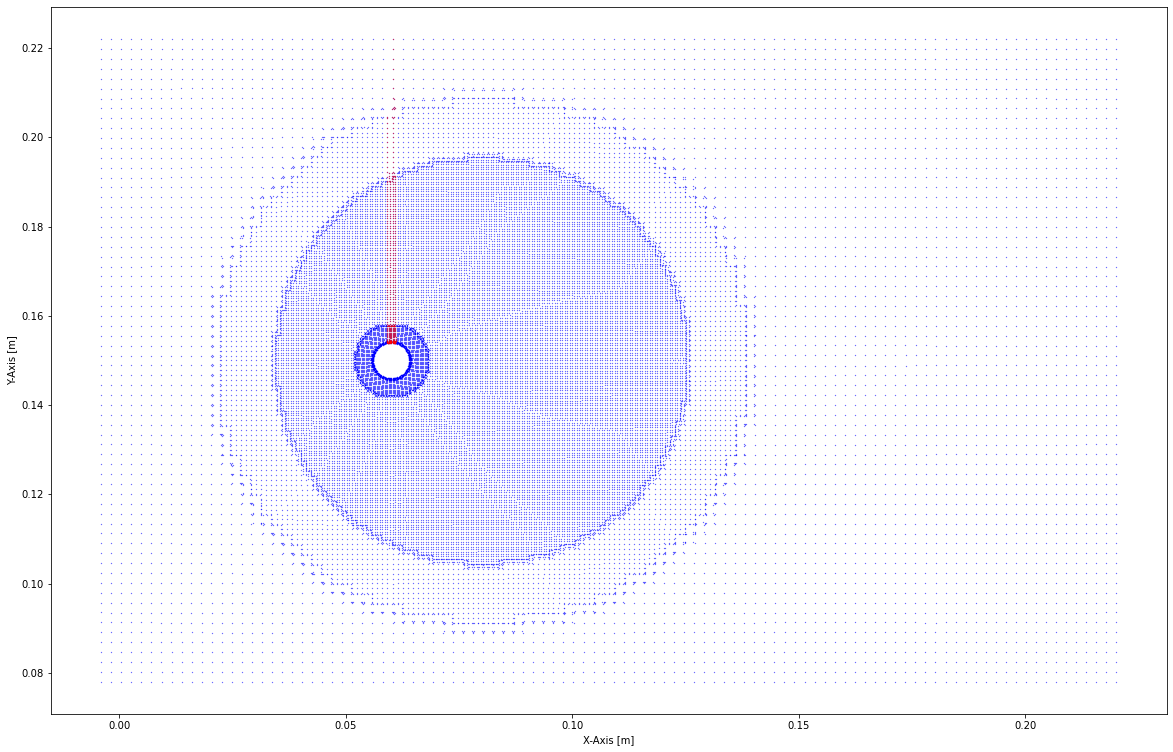

In [36]:
plt.figure(figsize=(20, 13))
plt.plot(x, y, color='blue', linestyle='None',
         linewidth=0.5, marker='.', markersize=0.5)
plt.plot(values[0],values[1], linestyle="None", linewidth=0.5, marker=".", markersize=0.5, color="red")
plt.xlabel("X-Axis [m]")
plt.ylabel("Y-Axis [m]")

plt.show()

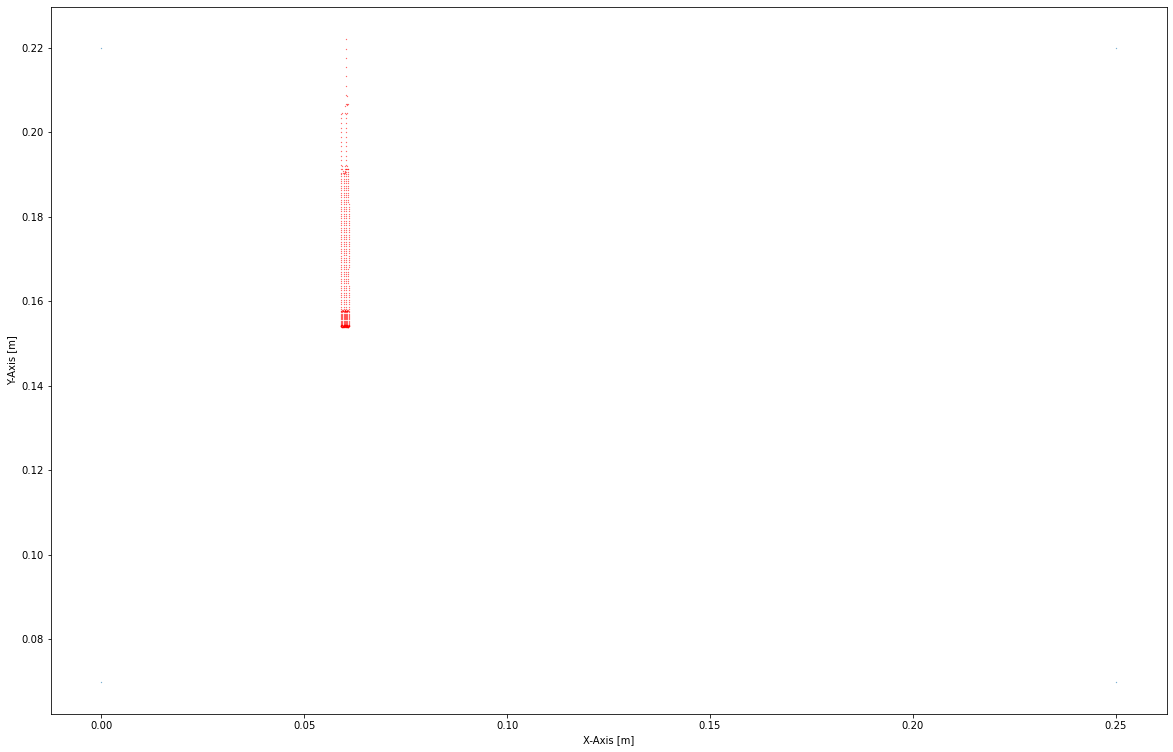

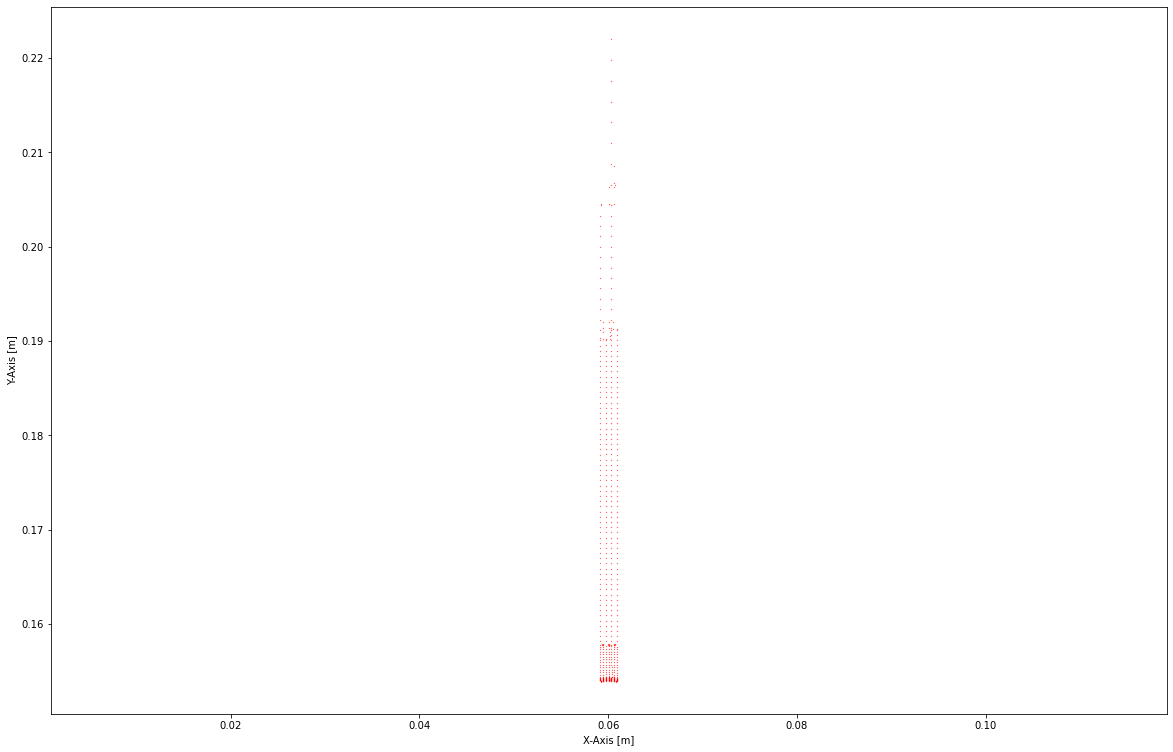

In [37]:
tmp = np.array([[0, 0.25, 0.25, 0], [0.07,0.07, 0.22,0.22]])
plt.figure(figsize=(20, 13))
plt.plot(tmp[0], tmp[1], linestyle="None", linewidth=0.5, marker=".", markersize=0.5)
plt.plot(values[0],values[1], linestyle="None", linewidth=0.5, marker=".", markersize=0.5, color="red")
plt.xlabel("X-Axis [m]")
plt.ylabel("Y-Axis [m]")

plt.show()
plt.figure(figsize=(20, 13))
plt.plot(values[0],values[1], linestyle="None", linewidth=0.5, marker=".", markersize=0.5, color="red")
plt.xlabel("X-Axis [m]")
plt.ylabel("Y-Axis [m]")
plt.axis('equal')
plt.show()


**1.4) Berechnen Sie für jeden Punkt im kleineren Teilgitter den Abstand zum nächstliegenden Nachbarpunkt.**

Das ist z.B. möglich, indem die Abstände von allen Punkten zu allen anderen Punkten bestimmt werden und dann für jeden Punkt der jeweils kleinste Abstand (größer 0!) herausgesucht wird.

  * Sortieren Sie die jeweils ermittelten Nachbar-Abstände in aufsteigender Reihenfolge.
  * Erstellen Sie eine Abbildung, die auf der $x$-Achse nur den Punktindex aufträgt und die jeweiligen Nachbar-Abstände auf der logarithmisch skalierten $y$-Achse.

In [38]:
# Find the shortest way:
# for x, y in zip(values)
# plt.plot(values[0], values[1], linestyle="None", marker=".", markersize=0.9)
# plt.show()
xy = values.T
D = np.sqrt(np.sum((xy[:,np.newaxis,:] - xy[np.newaxis, :,:])**2, axis=-1 ))

D= np.triu(D)
D


array([[0.        , 0.00029221, 0.00027502, ..., 0.00214992, 0.03540978,
        0.03606985],
       [0.        , 0.        , 0.00039719, ..., 0.00200003, 0.03540471,
        0.03606476],
       [0.        , 0.        , 0.        , ..., 0.0019254 , 0.03513475,
        0.03579482],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.0336279 ,
        0.03428757],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00066007],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [57]:
index_list = []
value_list = []
min_ = 0
# index_
for i, row in enumerate(D):
    for j, entry in enumerate(row):
        if j == 0:
            min_ = entry
        # print(entry)
        # print(i,j)
        if entry < min_ or min_ == 0:
            min_ = entry
            index_ = np.array([i,j])

    index_list.append(index_)
    value_list.append(min_)
"""Assumption, there is no Element that has the same distance to 2 elements which are both the nearest neighbors to the Element"""
index_list = np.array(index_list).T
value_list = np.array(value_list)
index_list
value_list
all_list = np.array([index_list[0], index_list[1], value_list])
all_list.shape

(3, 516)

In [40]:
# print(all_list.argsort(axis=1))
# koords_abstand= koords_abstand[:, koords_abstand[0,:].argsort()]
all_list = all_list[:, all_list[2,:].argsort()]



# EDIT: Man muss nur sortieren, um die Einträge zu bekommen. Ich habe die ganze Zeit versucht, die Längen den richtigen Indices zuzuordnen. 
all_list.sort()

In [41]:
# values[0, indexes]

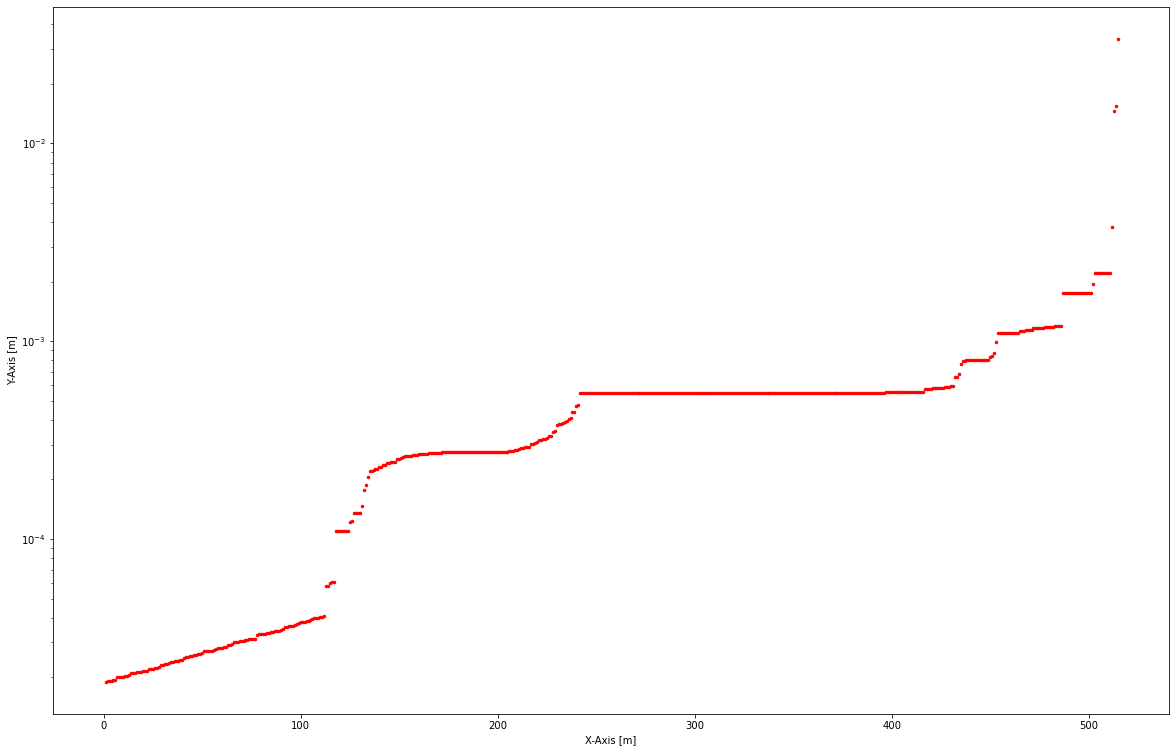

In [42]:
indexes_1 = all_list[0,:].astype(int)
indexes_2 = all_list[1,:].astype(int)
# print(indexes)
plt.figure(figsize=(20, 13))
# plt.plot(values[0, indexes_1], values[1, indexes_2], linestyle="-", linewidth=0.5, marker=".", markersize=5, color="red")
plt.plot(all_list[0], all_list[2], linestyle="None", linewidth=0.5, marker=".", markersize=5, color="red")
plt.xlabel("X-Axis [m]")
plt.ylabel("Y-Axis [m]")
plt.yscale("log")

plt.show()

In [43]:
"""This an internet solution using the complex type"""
# # build a complex array of your cells
# m,n = np.meshgrid(values_complex, values_complex)
# # get the distance via the norm
# out = abs(m-n)
# out

'This an internet solution using the complex type'

In [44]:
# plt.figure(figsize=(20,13))
# plt.plot(values[0][0:10], values[1][0:10], marker='o', markersize=6, linestyle="None")
# plt.grid(True)
# plt.show()

In [45]:
# # #differenzen berechnen
# # dx = values[0][..., np.newaxis] - values[0][np.newaxis, ...]
# # dy = values[1][..., np.newaxis] - values[1][np.newaxis, ...]
# # # dx, dy
# # # Laenge berechnen
# # d = np.sqrt(dx**2 + dy**2)

# # # d = dx + dy  # Ergibt die Länge des Verbindungsvektors
# # # dy

# # np.triu(d) #  Wir entfernen das untere Dreieck
# # print()
# # values
# # d
# # values_t
# # values_t = values.T
# # values_t
# #koords_abstand_1 = np.array([values[0] + values[1], np.arange(0, len(values[0])) ])
# koords_abstand = np.array(
#     [np.sqrt(values[0]**2 + values[1]**2), np.arange(0, len(values[0]))])

# koords_abstand = koords_abstand[:, koords_abstand[0, :].argsort()]
# #koords_abstand_1 = koords_abstand[:, koords_abstand[0,:].argsort()]
# koords_abstand  # hat jetzt den Index von dem Punkt am nächsten zum Ursprung in sortierter reihenfolge


In [46]:
# index = np.ndarray.astype(koords_abstand[1], int)
# index
# values[:, index]
# values
# sorted_dots = values[:, index]
# sorted_dots
# # Jetz sortierte dots
# # Abstand berechnen
# #differenzen berechnen
# dx = sorted_dots[0][..., np.newaxis] - sorted_dots[0][np.newaxis, ...]
# dy = sorted_dots[1][..., np.newaxis] - sorted_dots[1][np.newaxis, ...]
# # dx, dy
# # Laenge berechnen
# d = np.sqrt(dx**2 + dy**2)
# # d = dx + dy  # Ergibt die Länge des Verbindungsvektors
# dy, dx, d
# d_test = np.triu(d)
# d_test[d_test.argsort()]
# d_test
# # Der Kleinste Abstand ist immer in der Diagonale
# # Also Diagonalindizes bekommen
# diag_indices = np.diag_indices(len(d_test))
# diag_indices = np.array([diag_indices[0][:-1], diag_indices[1][:-1]+1])
# diag_indices
# out = d_test[diag_indices[0], diag_indices[1]]

# # Hier eigenen Code schreiben ...
# # Plotten
# plt.figure(figsize=(20, 13))
# # plt.plot(sorted_dots[0], sorted_dots[1], marker='o', markersize=6, linestyle="None")
# plt.plot(diag_indices[1], np.arange(0,len(diag_indices[1])), marker=".", markersize="1", linestyle="None")
# plt.grid(True)
# # plt.axis('equal')
# plt.show()
# diag_indices[1]

# pass

## 2) Strömungsgeschwindigkeiten

Nun sollen die im Datensatz auftretenden Geschwindigkeiten näher betrachtet werden.

**2.1) Erstellen Sie für einen groben Überblick [Histogramme](https://de.wikipedia.org/wiki/Histogramm) der drei Geschwindgikeitskomponenten.**

  * Sie können hierfür die matplotlib-Funktion [_hist()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) verwenden.
  * Zeichnen Sie die drei Graphen nebeneinander (3 Plots in einer Zeile).
  * Nutzen Sie für die Histogramme je 100 Bins gleichen Umfangs.
  * Wie groß ist die höchste Geschwindigkeit in $x$-Richtung?

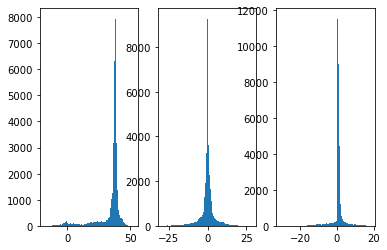

Hoechste Geschwindigkeit nach x: 52.5598 m/s


In [47]:
# Hier eigenen Code schreiben ...
plt.subplot(1,3,1)
plt.hist(u, bins=100)
plt.subplot(1,3,2)
plt.hist(v, bins=100)
plt.subplot(1,3,3)
plt.hist(w, bins=100)
plt.show()
print(f"Hoechste Geschwindigkeit nach x: {u.max()} m/s")

**2.2) Visualisieren Sie die Strömung in unterschiedlichen Plotvarianten.**

  * Berechnen Sie die Geschwindigkeitsbeträge (Länge der Geschwindigkeitsvektoren) an den Gitterpunkten.
  * Erzeugen Sie 4 Visualisierungen der Beträge:
      1. mithilfe der [_scatter()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)-Funktion und Farbskalierung der Werte.
      2. mithilfe der [_tricontourf()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tricontourf.html)-Funktion mit 8, 32 sowie 256 Farblevels (hier ist ausnahmsweise die Verwendung einer Schleife sinnvoll).
  * Zeichnen Sie immer den Zylinderkreis in weißer Farbe mit ein.
  * Fügen Sie jeweils einen [Colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) hinzu, damit die Farben Geschwindigkeitswerten zugeordnet werden können.

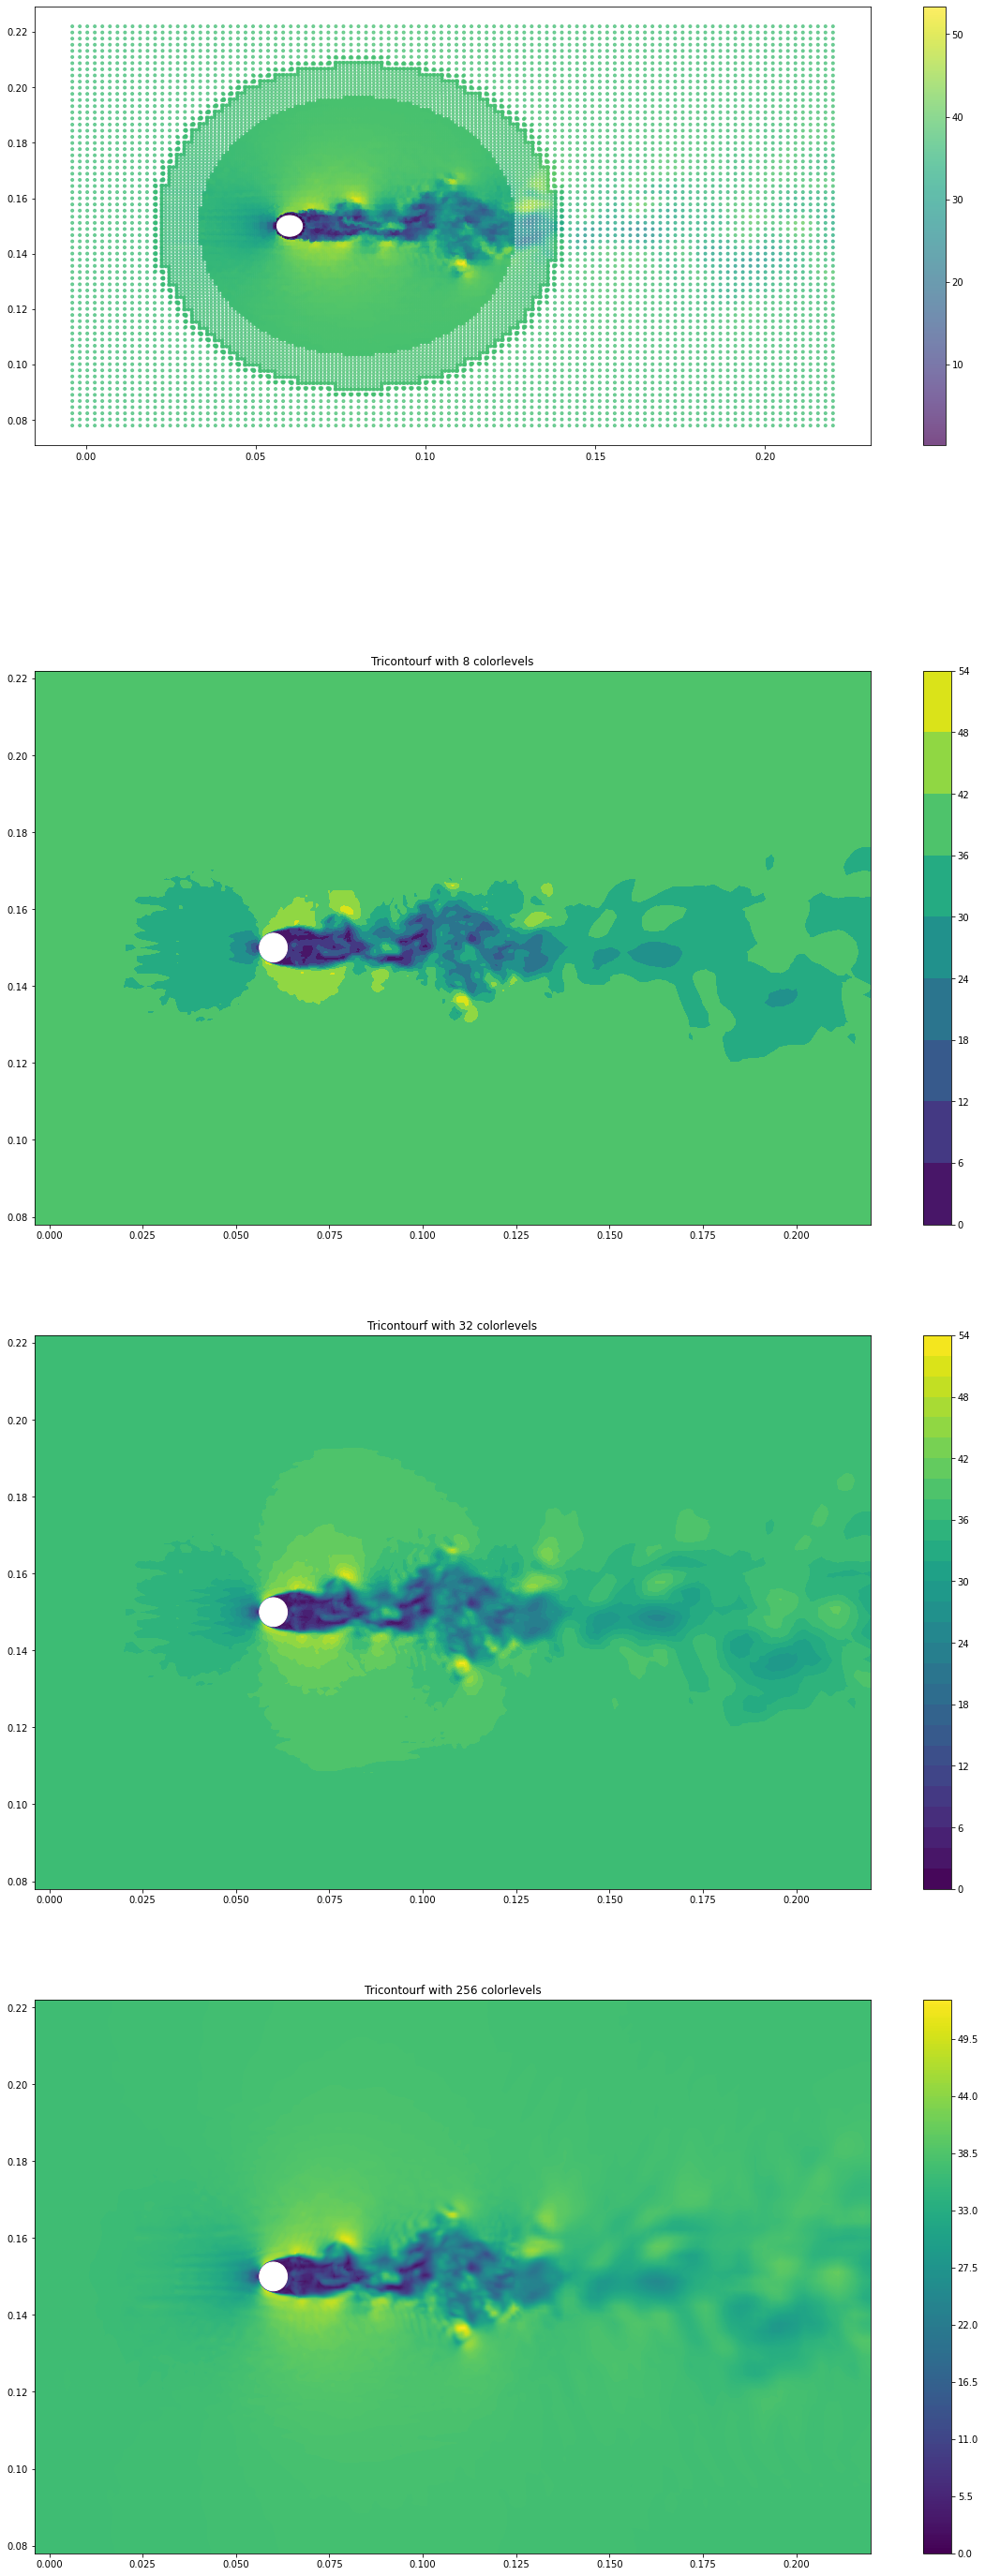

In [48]:
fig = plt.figure(5, (20, 50))
plt.subplot(411)
# Hier eigenen Code schreiben ...
"""
Länge berechnen: b-a = [1,2,3] - [2,3,4] = [-1,-1,-1]
|ab| = sqrt(x1**2 + x2**2 + x3**2)
"""

xy = np.array([x,y])
uv = np.array([u,v])
geschw_xy = uv - xy
geschw_xy = np.sqrt(geschw_xy[0]**2 + geschw_xy[1]**2)

xyz = np.array([x,y,z])
uvw = np.array([u,v,w])
geschw_xyz = uvw - xyz
geschw_xyz = np.sqrt(geschw_xyz[0]**2 + geschw_xyz[1]**2 + geschw_xyz[2]**2)



# plt.scatter(x,y, c=geschw_xy, marker='.', alpha=0.7)
# plt.colorbar()
# # plt.scatter(geschw)
# plt.gca().add_patch(patch.Circle(kreis_xy, radius=kreis_radius, color='white'))


# Scatterplot
plt.subplot(5,1,1)
plt.scatter(x,y, c=geschw_xyz, marker='.', alpha=0.7)
plt.colorbar()
# plt.scatter(geschw)
plt.gca().add_patch(patch.Circle(kreis_xy, radius=kreis_radius, color='white'))


#  tricontourf plot
import matplotlib.tri as mtri
triang = mtri.Triangulation(x,y)
for i, val in enumerate([8, 32, 256]):
    plt.subplot(4,1,i+2)
    plt.tricontourf(triang, geschw_xy, levels=val)
    plt.gca().add_patch(patch.Circle(kreis_xy, radius=kreis_radius, color='white'))
    plt.colorbar()
    plt.title(f"Tricontourf with {val} colorlevels")


plt.show()


## 3) Wirbelstärke

Um "interessante" Regionen in einem Strömungsfeld zu identifizieren, wird häufig die [Wirbelstärke](https://de.wikipedia.org/wiki/Wirbelst%C3%A4rke) verwendet, die nun berechnet werden soll. 
Hier genügt die Berechnung in 2D, d.h. die Wirbelstärke in $z$-Richtung. Diese ist wie folgt definiert:

$$
    \omega_z = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}
$$

Offenbar werden die partiellen Ableitungen der Geschwindigkeiten benötigt. 
Diese waren in der Datendatei jedoch nicht enthalten und müssen demzufolge aus verfügbaren Daten berechnet werden. 
Da nur diskrete Werte vorliegen, muss die Ableitung über den [Differenzenquotienten](https://de.wikipedia.org/wiki/Differenzenquotient) erfolgen. 
Dies wäre viel einfacher, wenn die Daten auf einem regelmäßigen rechteckigen Gitter vorliegen würden.

Praktischerweise enthält das SciPy-Modul mit [_griddata()_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html) eine Funktion, die unregelmäßige Daten auf ein reguläres Gitter abbilden kann.
Um ein Gitter mit regelmäßigen Abständen zu erzeugen, kann zum Beispiel die Funktion [_meshgrid()_](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) zusammen mit [_arange()_](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) (beide aus dem NumPy-Modul) verwendet werden.

**3.1) Erzeugen Sie ein Gitter mit regelmäßigen Abständen und interpolieren Sie die unregelmäßig verteilten Geschwindigkeitsdaten auf dieses Gitter.**

  * Das neue Gitter sollte eine Schrittweite von $10^{-4}\,$m haben (sowohl in $x$- als auch in $y$-Richtung) und den Simulationsbereich beinhalten.
  * Interpolieren Sie $u$, $v$ und $w$ jeweils separat, sodass Sie drei neue (große) Arrays erhalten.
  * Zur Überprüfung, ob alles korrekt funktioniert hat, visualisieren Sie den Betrag der neuen Vektoren mithilfe von [_imshow()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).
      * Setzen Sie den Parameter `vmax` auf einen sinnvollen Wert.
      * Tragen Sie im Parameter `extent` den tatsächlichen Umfang des Gitters ein.
      * Zeichnen Sie auch hier den weißen Kreis an die passende Position.
  

_Hinweis: Wenn Sie sich der Leistungsfähigkeit Ihres Computers nicht sicher sind, beginnen Sie mit einer gröberen Schrittweite._

In [49]:
from scipy.interpolate import griddata  # Vorschlag für Interpolationsmethode für sanfte Übergänge: "cubic"
# Hier eigenen Code schreiben ...
# nx, ny = (3, 2) # int 3, int 2

# x_m = np.arange(0, 0.225, 0.0001)
# y_m = np.arange(0, 0.225, 0.0001)
x_m = np.arange(x.min(), x.max(), 0.0001)
y_m = np.arange(y.min(), y.max(), 0.0001)
print(x.max(), x.min())
print(y.max(), y.min())

# print(x)
# print(y)
grid_x, grid_y = np.meshgrid(x_m,y_m)

xy = np.array([x,y])

grid_zu = griddata(xy.T, u, (grid_x, grid_y), method="cubic")
print(f"grid_zu max: {grid_zu.max()}")

grid_zv = griddata(xy.T, v, (grid_x, grid_y), method="cubic")
print(f"grid_zv max: {grid_zv.max()}")

grid_zw = griddata(xy.T, w, (grid_x, grid_y), method="cubic")
print(f"grid_zw max: {grid_zw.max()}")

0.22 -0.004
0.222 0.078
grid_zu max: 52.738440715772995
grid_zv max: 223.749089228657
grid_zw max: 18.6060640362045


In [50]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

print(find_nearest(y_m, kreis_xy[1]))

patch_tuple = (find_nearest(x_m, kreis_xy[0])  ,   find_nearest(y_m, kreis_xy[1]) )
patch_tuple

720


(640, 720)

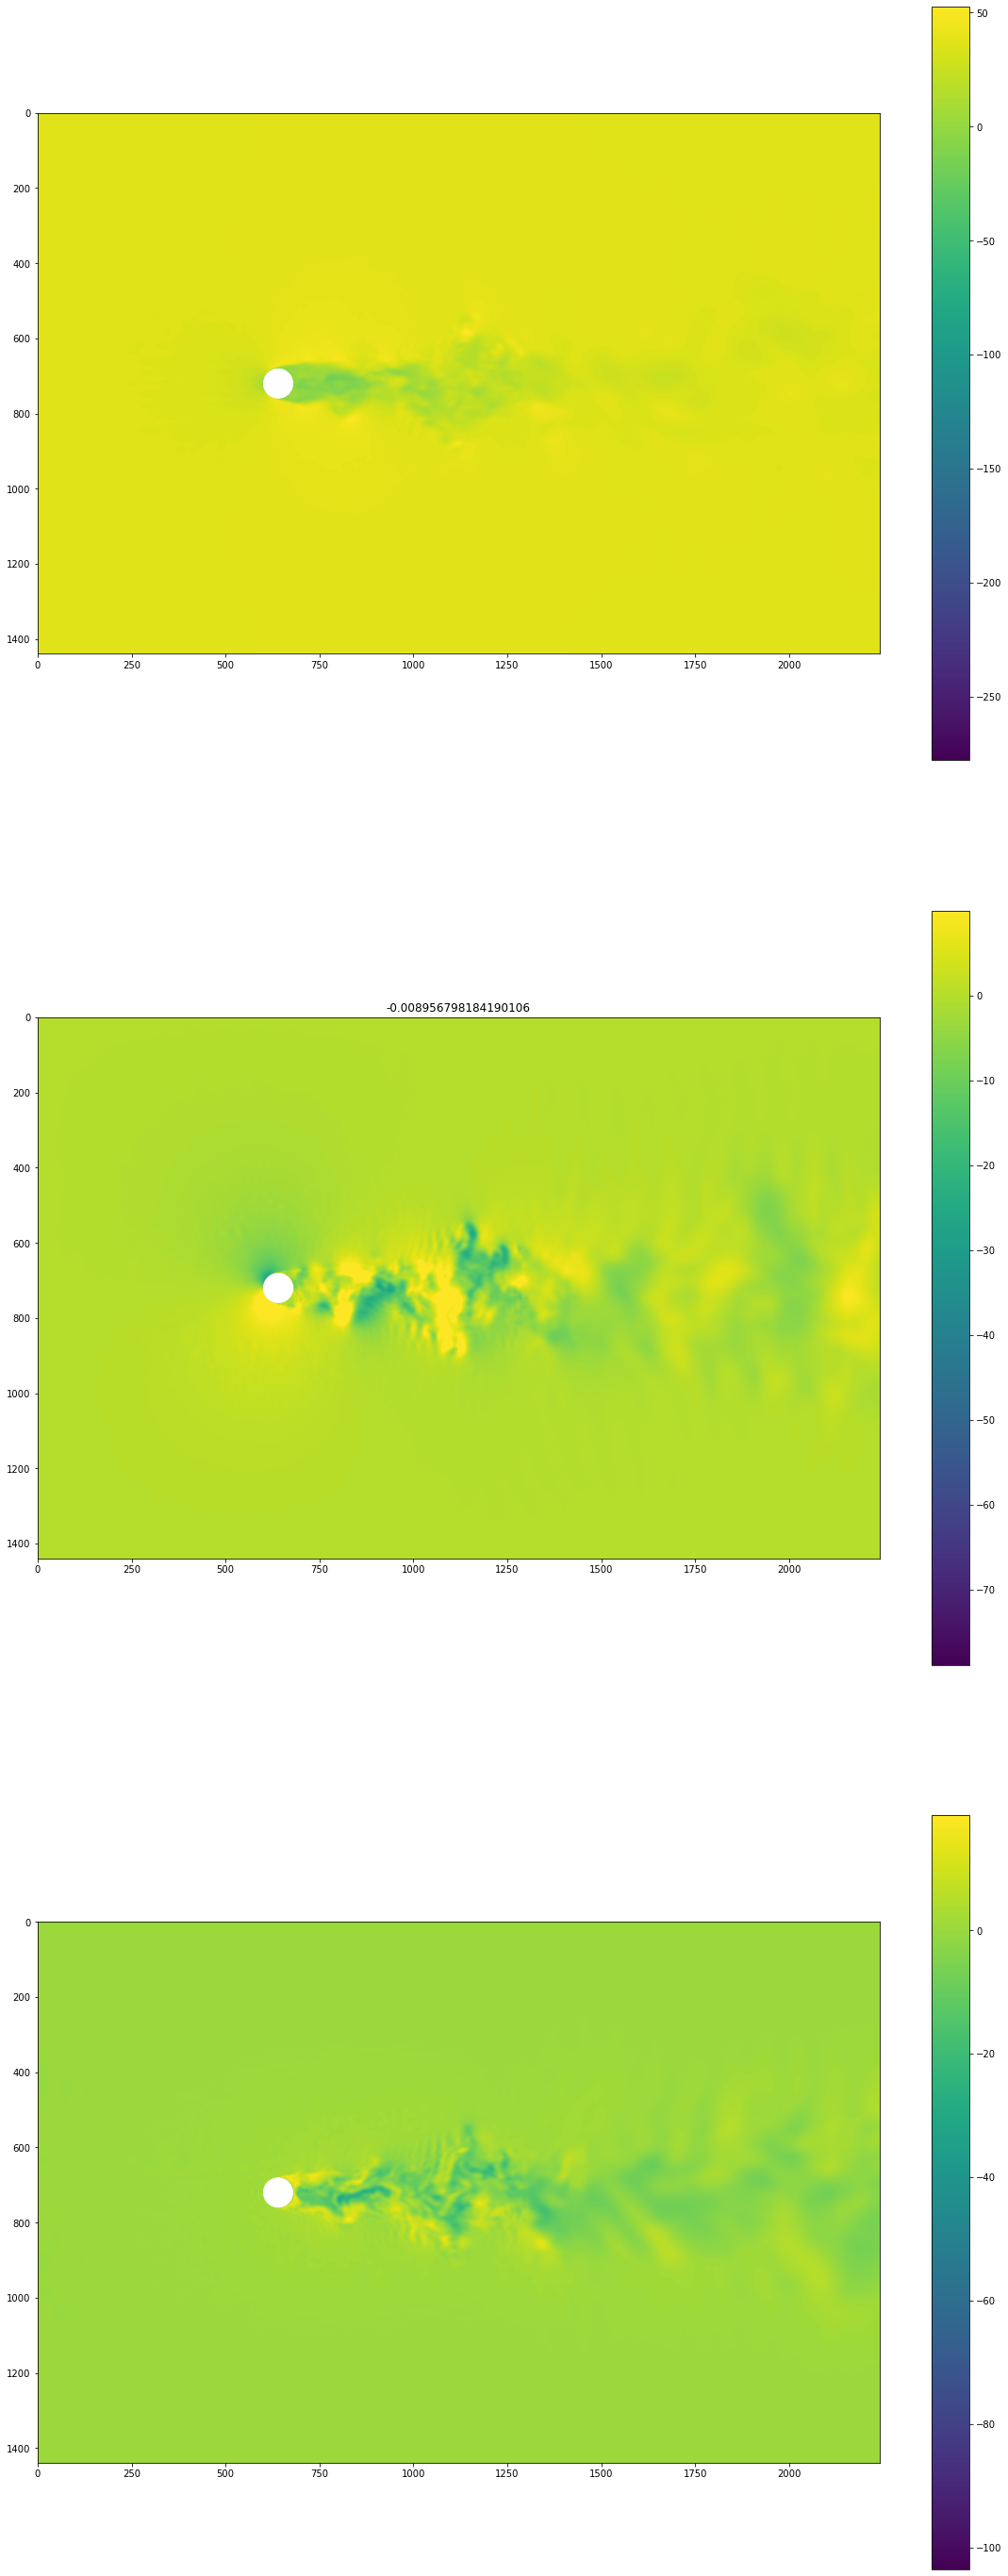

In [51]:


fig = plt.figure(6, (20,50))
plt.subplot(3,1,1) ####
plt.imshow(grid_zu, vmax=grid_zu.max())
plt.colorbar()
radius_ = 39

plt.gca().add_patch(patch.Circle(patch_tuple, radius=radius_, color='white'))

plt.subplot(3,1,2) ####
# plt.imshow(grid_zv, vmax=grid_zv.max()-219)  # hier geringeren Wert nehmen, weil alles sonst sehr blau ist
plt.imshow(grid_zv, vmax=grid_zv.mean() + 10) # wir nehmen den durchschnitt plus 10
plt.colorbar()
plt.title(f"{grid_zv.mean()}")
# plt.gca().add_patch(patch.Circle(kreis_xy, radius=kreis_radius, color='white'))
plt.gca().add_patch(patch.Circle(patch_tuple, radius=radius_, color='white'))
plt.subplot(3,1,3)
plt.imshow(grid_zw, vmax=grid_zw.max(), )
plt.colorbar()
plt.gca().add_patch(patch.Circle(patch_tuple, radius=radius_, color='white'))

plt.show()

In [52]:
grid_zv

array([[-0.00145445, -0.00143028, -0.00140305, ..., -0.01209597,
        -0.01203564, -0.01197308],
       [-0.00138475, -0.00136856, -0.00134727, ..., -0.01245139,
        -0.01239871, -0.01234492],
       [-0.00131216, -0.00130517, -0.00129206, ..., -0.01282441,
        -0.01278179, -0.01272447],
       ...,
       [-0.00037877, -0.00027622, -0.00017943, ...,  0.01001803,
         0.00989317,  0.00973916],
       [-0.00039989, -0.00030034, -0.00020337, ...,  0.00961819,
         0.00950395,  0.00937119],
       [-0.00042114, -0.00032345, -0.0002249 , ...,  0.00923679,
         0.0091193 ,  0.00899786]])

Mit den nun auf einem regelmäßigen Gitter vorliegenden Daten können die partiellen Ableitungen einfach approximiert werden über

$$
    \frac{\partial v_{i,j}}{\partial x} = \frac{v_{i,j+1}-v_{i,j}}{\Delta x}
$$

und

$$
    \frac{\partial u_{i,j}}{\partial y} = \frac{u_{i+1,j}-u_{i,j}}{\Delta y}~,
$$

mit $i=0\ldots N_\text{Zeilen}-1$, $j=0\ldots N_\text{Spalten}-1$.

**3.2) Berechnen Sie die Ableitungen und die Wirbelstärken $\omega_z$ entsprechend obiger Gleichungen. Visualisieren Sie die Wirbelstärken mit _imshow()_.**

  * Wählen Sie eine divergierende [Colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) und stellen Sie sicher, dass der Wert 0 darin weiß dargestellt wird.
  * Zeichnen Sie auch hier den weißen Zylinderkreis ein.
  * Setzen Sie den dargestellten Wertebereich so, dass der Plot informativ ist.
  * Fügen Sie einen Colorbar hinzu.

_Hinweis: Versuchen Sie, effizienten Code zu schreiben! Diese Berechnung sollte nicht allzu lange dauern (vielleicht einige wenige Sekunden). Erhöhen Sie zu Testzwecken die Schrittweite, falls erforderlich._

In [53]:
print(grid_zu.shape)
print(y_m.shape)

(1440, 2240)
(1440,)


In [54]:
# Hier eigenen Code schreiben ...
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
print(grid_zv.shape, grid_zu.shape)
print(x_m.shape, y_m.shape)



dvdx = ( grid_zv[1:,1:] - grid_zv[:-1,:-1] ) / (x_m[1:] - x_m[:-1])  #Ableitung nach x

print(grid_zu[1:,:].T.shape)
dudy = (grid_zu[1:,1:].T - grid_zu[:-1,:-1].T ) /(y_m[1:] - y_m[:-1])    #  Ableitung nach y

print(dvdx.shape, dudy.shape)

# dudy
omega_z = dvdx - dudy.T
omega_z


(1440, 2240) (1440, 2240)
(2240,) (1440,)
(2240, 1439)
(1439, 2239) (2239, 1439)


array([[ 1.95181449,  1.85955397,  1.76955706, ..., -9.13801815,
        -9.11217497, -9.13620246],
       [ 1.81276828,  1.70610336,  1.60918828, ..., -9.16817165,
        -9.26461544, -9.29644195],
       [ 1.68116989,  1.55629351,  1.46541246, ..., -9.47716357,
        -9.54604692, -9.3174812 ],
       ...,
       [ 1.89687435,  1.69560074,  1.46626867, ..., -7.49056575,
        -7.49049927, -7.4543795 ],
       [ 1.70398485,  1.48301959,  1.23437239, ..., -7.41382147,
        -7.40015941, -7.38773449],
       [ 1.49026524,  1.24735349,  1.00984123, ..., -7.30861856,
        -7.31104677, -7.28502662]])

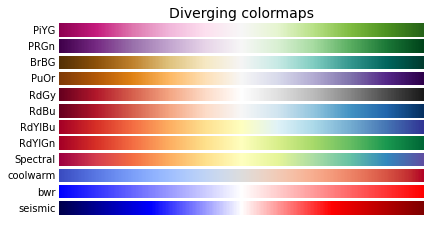

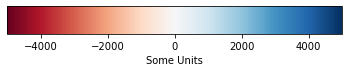

In [55]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

plot_color_gradients('Diverging',
                         ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                          'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])



fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.RdBu
norm = mpl.colors.Normalize(vmin=-5000, vmax=5000)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Some Units')

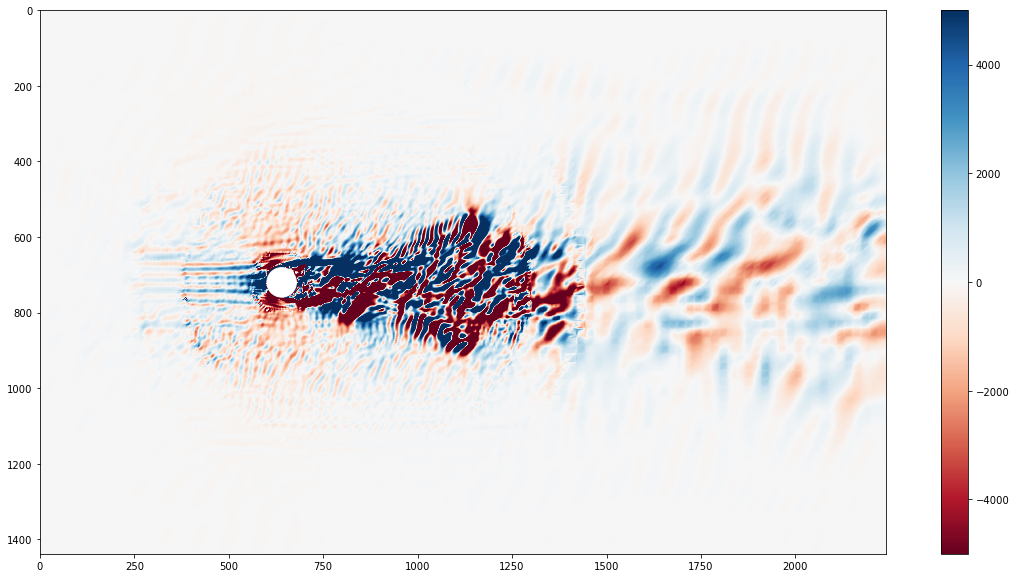

In [56]:
from matplotlib import colors
fig = plt.figure(9,(20,10))

             #cax=ax, orientation='horizontal', label='Some Units')
plt.imshow(omega_z, cmap=cmap, norm=norm)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),)
# plt.colorbar()
plt.gca().add_patch(patch.Circle(patch_tuple, radius=radius_, color='white'))
plt.show()